In [44]:
from ast import literal_eval
import glob2
import pandas as pd
import numpy as np
import json
import csv
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [45]:
op = pd.read_csv('label_op.csv', encoding='utf-8')
op

,image_id,image_name,image_height,image_width,op_cate,op_top_len,op_bottom_len,op_mat
0,1241458,"018-285-4,257-35,865-Hanna_409_02.jpg",800,800,드레스,반팔,니렝스,우븐
1,1241459,"018-285-4,257-35,865-Hanna_409_03.jpg",800,800,드레스,반팔,니렝스,우븐
2,1241460,"018-285-4,257-35,865-Hanna_409_05.jpg",800,800,드레스,반팔,니렝스,우븐
3,1241463,"018-285-4,257-35,865-Hanna_409_08.jpg",800,800,드레스,반팔,니렝스,우븐
4,1241464,"018-285-4,257-35,865-Hanna_409_09.jpg",800,800,드레스,반팔,니렝스,우븐
...,...,...,...,...,...,...,...,...
53853,1269305,20201117_233543_포켓멜빵바지-159834165367939700_4452...,1066,800,점프수트,민소매,발목,우븐
53854,1270300,20201117_234327_베이직점프슈트-159903336199824900_200...,1066,800,점프수트,민소매,발목,우븐
53855,1270301,20201117_234327_베이직점프슈트-159903336318518600_664...,1066,800,점프수트,민소매,발목,우븐
53856,1270302,20201117_234327_베이직점프슈트-159903336438066600_121...,1066,800,점프수트,민소매,발목,우븐


In [46]:
df_op = pd.get_dummies(data = op, columns = ['op_cate', 'op_top_len', 'op_bottom_len', 'op_mat'])
df_op

,image_id,image_name,image_height,image_width,op_cate_드레스,op_cate_점프수트,op_top_len_7부소매,op_top_len_긴팔,op_top_len_민소매,op_top_len_반팔,...,op_mat_우븐,op_mat_울/캐시미어,op_mat_자카드,op_mat_저지,op_mat_코듀로이,op_mat_트위드,op_mat_패딩,op_mat_퍼,op_mat_플리스,op_mat_헤어 니트
0,1241458,"018-285-4,257-35,865-Hanna_409_02.jpg",800,800,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1241459,"018-285-4,257-35,865-Hanna_409_03.jpg",800,800,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,1241460,"018-285-4,257-35,865-Hanna_409_05.jpg",800,800,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,1241463,"018-285-4,257-35,865-Hanna_409_08.jpg",800,800,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1241464,"018-285-4,257-35,865-Hanna_409_09.jpg",800,800,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53853,1269305,20201117_233543_포켓멜빵바지-159834165367939700_4452...,1066,800,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
53854,1270300,20201117_234327_베이직점프슈트-159903336199824900_200...,1066,800,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
53855,1270301,20201117_234327_베이직점프슈트-159903336318518600_664...,1066,800,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
53856,1270302,20201117_234327_베이직점프슈트-159903336438066600_121...,1066,800,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [47]:
df_op.columns

Index(['image_id', 'image_name', 'image_height', 'image_width', 'op_cate_드레스',
       'op_cate_점프수트', 'op_top_len_7부소매', 'op_top_len_긴팔', 'op_top_len_민소매',
       'op_top_len_반팔', 'op_top_len_없음', 'op_top_len_캡', 'op_bottom_len_니렝스',
       'op_bottom_len_맥시', 'op_bottom_len_미니', 'op_bottom_len_미디',
       'op_bottom_len_발목', 'op_mat_가죽', 'op_mat_네오프렌', 'op_mat_니트',
       'op_mat_데님', 'op_mat_레이스', 'op_mat_린넨', 'op_mat_메시', 'op_mat_벨벳',
       'op_mat_스웨이드', 'op_mat_스판덱스', 'op_mat_시퀸/글리터', 'op_mat_시폰', 'op_mat_실크',
       'op_mat_우븐', 'op_mat_울/캐시미어', 'op_mat_자카드', 'op_mat_저지', 'op_mat_코듀로이',
       'op_mat_트위드', 'op_mat_패딩', 'op_mat_퍼', 'op_mat_플리스', 'op_mat_헤어 니트'],
      dtype='object')

In [48]:
from keras.preprocessing import image
from tqdm import tqdm

In [49]:
train_image = []
for i in tqdm(range(300, 600)):
    img = image.load_img('C:/img/'+df_op['image_name'][i],target_size=(400,400,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|██████████| 300/300 [00:03<00:00, 76.52it/s] 


In [50]:
print(len(train_image))

300


In [51]:
X = np.array(train_image[:300])
X.shape

(300, 400, 400, 3)

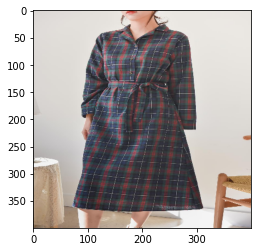

In [52]:
plt.imshow(X[1])

In [53]:
y = np.array(df_op.drop(['image_id', 'image_name', 'image_height', 'image_width'], axis=1)[:300])
len(y)

300

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

KeyboardInterrupt: 

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(400,400,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(36, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
for i in range(20):
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

In [ ]:
model.save('model_op.h5')
print('saved')

In [ ]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

In [56]:
def count_correct_result(list, result):
    answer = 0
    list_answer = []
    style_list = list[0:2].tolist()
    top_len_list = list[2:8].tolist()
    bottom_len_list = list[8:13].tolist()
    mat_list = list[13: 36].tolist()
    list_answer.append(style_list.index(max(style_list)))
    list_answer.append(top_len_list.index(max(top_len_list)) + 2)
    list_answer.append(bottom_len_list.index(max(bottom_len_list)) + 6)
    list_answer.append(mat_list.index(max(mat_list)) + 5)
    for i in result:
        if i in list_answer:
            answer += 1
    return answer

In [ ]:
def real_answer(image_name):
    count = -4
    answer = []
    temp_df = df_op[df_op['image_name'] == image_name]
    for i in temp_df.columns:
        if count >= 0 and int(temp_df[i].values[0]) == 1:
            answer.append(count)
        count += 1
    return answer

In [ ]:
from random import randint
import os.path
from tqdm import tqdm

In [ ]:
reconstructed_model = keras.models.load_model("model_op.h5")

In [ ]:
img = image.load_img('C:/img/(116)IMG_1.jpg',target_size=(400,400,3))
img = image.img_to_array(img)
img = img/255
print(reconstructed_model.predict(img.reshape(1,400,400,3))[0])
count_correct_result(reconstructed_model.predict(img.reshape(1,400,400,3))[0], real_answer("(116)IMG_1.jpg"))

In [54]:
answer = 0
sum = 0
for i in tqdm(range(0, 300)):
    try:
        name = df_op['image_name'][randint(1, 53858 )]
        if os.path.isfile('C:/img/' + name):
            img = image.load_img('C:/img/' + name,target_size=(400,400,3))
        if os.path.isfile('C:/img2/' + name):
            img = image.load_img('C:/img2/' + name,target_size=(400,400,3))
    except:
        continue
    img = image.img_to_array(img)
    img = img/255
    answer += count_correct_result(reconstructed_model.predict(img.reshape(1,400,400,3))[0], real_answer(name))
    sum += 4
print("Accuracy = " + str(answer / sum))

  0%|          | 0/300 [00:00<?, ?it/s]

ERROR! Session/line number was not unique in database. History logging moved to new session 74


100%|██████████| 300/300 [00:58<00:00,  5.15it/s]

Accuracy = 0.32916666666666666
